## 準備資料

In [38]:
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pylab as plt
import numpy as np
torch.manual_seed(0)

plot data

In [39]:
def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')
    plt.title('y = '+ str(data_sample[1]))

前處理資料

In [40]:
IMAGE_SIZE = 28 # Original size: 28

composed = transforms.Compose([transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)) ,transforms.ToTensor(),])

MNIST 手寫數字<br>
training set of 60,000 examples, and  test set of 10,000 examples

In [41]:
train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=composed)

In [42]:
validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=composed)

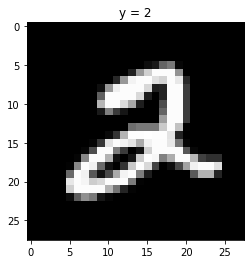

In [43]:
show_data(train_dataset[5])

## CNN

In [27]:
class CNN(nn.Module):
    
    # Contructor
    def __init__(self, out_1=16, out_2=32):
        super(CNN, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2)
        self.maxpool1=nn.MaxPool2d(kernel_size=2)

        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2)
        self.maxpool2=nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(out_2 * 4 * 4, 10)
    
    # Prediction
    def forward(self, x):
        x = self.cnn1(x)
        x = torch.relu(x)
        x = self.maxpool1(x)
        x = self.cnn2(x)
        x = torch.relu(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        return x

實體化模型

In [28]:
model = CNN(out_1=16, out_2=32)

定義超參數、cost function、optimizer

In [29]:
criterion = nn.CrossEntropyLoss()
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000)

定義訓練函式

In [36]:
def train_model(model,train_loader,validation_loader,optimizer,n_epochs=4):

  N_train=len(train_dataset)  
  N_test=len(validation_dataset)
  accuracy_list=[]
  trainning_loss_list=[]
  cost_list=[]

  for epoch in range(n_epochs):
    cost = 0
    for x, y in train_loader:
      model.train()
      optimizer.zero_grad()
      print(x.shape)
      z = model(x)
      loss = criterion(z, y)
      loss.backward()
      optimizer.step()
      trainning_loss_list.append(loss.data)
      cost += loss.item()
    cost = cost / N_train  
    cost_list.append(cost)

    correct=0
    with torch.no_grad(): 
      for x_test, y_test in validation_loader:
        model.eval()
        z = model(x_test)
        _, yhat = torch.max(z.data, 1)
        correct += (yhat == y_test).sum().item()
      accuracy = correct / N_test
      accuracy_list.append(accuracy)
     
  return accuracy_list, trainning_loss_list, cost_list

訓練CNN模型


In [37]:
%%time
accuracy_list_normal, trainning_loss_list_normal, cost_list_normal = train_model(model=model,n_epochs=4,train_loader=train_loader,validation_loader=validation_loader,optimizer=optimizer)

torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([10

torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([10

torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([10

torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([10

torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([10

torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([10

torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([10

torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([100, 1, 16, 16])
torch.Size([10

Learning Curve

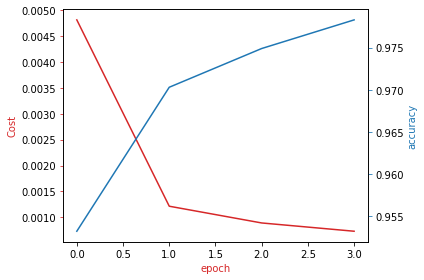

In [32]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(cost_list_normal, color=color)
ax1.set_xlabel('epoch', color=color)
ax1.set_ylabel('Cost', color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color) 
ax2.set_xlabel('epoch', color=color)
ax2.plot( accuracy_list_normal, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

In [35]:
torch.save(model.state_dict(), r"E:\user\Documents\Projects\MNIST\model\cnn")

## CNN + Batch_normalize

In [ ]:
class CNN_batch(nn.Module):
    
    # Contructor
    def __init__(self, out_1=16, out_2=32,number_of_classes=10):
        super(CNN_batch, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2)
        self.conv1_bn = nn.BatchNorm2d(out_1)

        self.maxpool1=nn.MaxPool2d(kernel_size=2)
        
        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2)
        self.conv2_bn = nn.BatchNorm2d(out_2)

        self.maxpool2=nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(out_2 * 4 * 4, number_of_classes)
        self.bn_fc1 = nn.BatchNorm1d(10)
    
    # Prediction
    def forward(self, x):
        x = self.cnn1(x)
        x=self.conv1_bn(x)
        x = torch.relu(x)
        x = self.maxpool1(x)
        x = self.cnn2(x)
        x=self.conv2_bn(x)
        x = torch.relu(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x=self.bn_fc1(x)
        return x

In [ ]:
model_batch=CNN_batch(out_1=16, out_2=32)

In [ ]:
criterion = nn.CrossEntropyLoss()
learning_rate = 0.1
optimizer = torch.optim.SGD(model_batch.parameters(), lr = learning_rate)

In [ ]:
%%time
accuracy_list_batch, trainning_loss_list_batch, cost_list_batch=train_model(model=model_batch,n_epochs=4,train_loader=train_loader,validation_loader=validation_loader,optimizer=optimizer)

In [ ]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(cost_list_batch, color=color)
ax1.set_xlabel('epoch', color=color)
ax1.set_ylabel('Cost', color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color) 
ax2.set_xlabel('epoch', color=color)
ax2.plot( accuracy_list_batch, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

### CNN vs CNN+Batch Normalize

In [ ]:
# Plot the loss and accuracy

plt.plot(trainning_loss_list_normal, 'b',label='loss normal cnn ')
plt.plot(trainning_loss_list_batch,'r',label='loss batch cnn')
plt.xlabel('iteration')
plt.title("loss")
plt.legend()
plt.show()

In [ ]:
plt.plot(accuracy_list_normal, 'b',label=' normal CNN')
plt.plot(accuracy_list_batch,'r',label=' CNN with Batch Norm')
plt.xlabel('Epoch')
plt.title("Accuracy ")
plt.legend()
plt.show()

## 使用GPU加速CNN

In [ ]:
torch.cuda.is_available()

In [ ]:
device = torch.device('cuda:0')

建立model

In [ ]:
class CNN(nn.Module):
    
    # Contructor
    def __init__(self, out_1=16, out_2=32):
        super(CNN, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2)
        self.maxpool1=nn.MaxPool2d(kernel_size=2)

        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2)
        self.maxpool2=nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(out_2 * 4 * 4, 10)
    
    # Prediction
    def forward(self, x):
        x = self.cnn1(x)
        x = torch.relu(x)
        x = self.maxpool1(x)
        x = self.cnn2(x)
        x = torch.relu(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        return x

實體化並移動model至GPU

In [ ]:
model = CNN(out_1=16, out_2=32)
model.to(device)

設定超參數

In [ ]:
criterion = nn.CrossEntropyLoss()
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000)

定義訓練函式

In [ ]:
def train_model(model,train_loader,validation_loader,optimizer,n_epochs=4):
  N_train=len(train_dataset)
  N_test=len(validation_dataset)
  accuracy_list=[]
  trainning_loss_list=[]
  cost_list=[]

  for epoch in range(n_epochs):
    cost = 0
    for x, y in train_loader:
      model.train()
      x, y = x.to(device), y.to(device)
      optimizer.zero_grad()
      z = model(x)
      loss = criterion(z, y)
      loss.backward()
      optimizer.step()
      trainning_loss_list.append(loss.data)
      cost += loss.item()
    cost = cost / N_train   
    cost_list.append(cost)

    correct=0
    with torch.no_grad(): 
      for x_test, y_test in validation_loader:
        model.eval()
        x_test, y_test= x_test.to(device), y_test.to(device)
        z = model(x_test)
        _, yhat = torch.max(z.data, 1)
        correct += (yhat == y_test).sum().item()
      accuracy = correct / N_test
      accuracy_list.append(accuracy)
     
  return accuracy_list, trainning_loss_list, cost_list

訓練Model

In [ ]:
%%time
accuracy_list_gpu, trainning_loss_list_gpu, cost_list_gpu = train_model(model=model,n_epochs=4,train_loader=train_loader,validation_loader=validation_loader,optimizer=optimizer)

Learning Curve

In [ ]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(cost_list_gpu, color=color)
ax1.set_xlabel('epoch', color=color)
ax1.set_ylabel('Cost', color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color) 
ax2.set_xlabel('epoch', color=color)
ax2.plot( accuracy_list_gpu, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

### CNN vs CNN (GPU)

In [ ]:
# Plot the loss and accuracy

plt.plot(trainning_loss_list_normal, 'b',label='loss normal cnn ')
plt.plot(trainning_loss_list_gpu,'r',label='loss cnn (GPU)')
plt.xlabel('iteration')
plt.title("loss")
plt.legend()
plt.show()

In [ ]:
plt.plot(accuracy_list_normal, 'b',label=' normal CNN')
plt.plot(accuracy_list_gpu,'r',label=' CNN (GPU)')
plt.xlabel('Epoch')
plt.title("Accuracy ")
plt.legend()
plt.show()

## CNN (GPU) + early stopping

early stopping

In [44]:
class EarlyStopping:
    """Early stops the training if validation loss doesn't improve after a given patience."""
    def __init__(self, patience=7, verbose=False, delta=0, path='checkpoint.pt', trace_func=print):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
                            Default: 7
            verbose (bool): If True, prints a message for each validation loss improvement. 
                            Default: False
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
                            Default: 0
            path (str): Path for the checkpoint to be saved to.
                            Default: 'checkpoint.pt'
            trace_func (function): trace print function.
                            Default: print            
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta
        self.path = path
        self.trace_func = trace_func
    def __call__(self, val_loss, model):

        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            self.trace_func(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decrease.'''
        if self.verbose:
            self.trace_func(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), self.path)
        self.val_loss_min = val_loss

In [46]:
class CNN(nn.Module):
    
    # Contructor
    def __init__(self, out_1=16, out_2=32):
        super(CNN, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2)
        self.maxpool1=nn.MaxPool2d(kernel_size=2)
        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2)
        self.maxpool2=nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(out_2 * 7 * 7, 10)
    
    # Prediction
    def forward(self, x):
        x = self.cnn1(x)
        x = torch.relu(x)
        x = self.maxpool1(x)
        x = self.cnn2(x)
        x = torch.relu(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        return x

In [47]:
if torch.cuda.is_available():
  device = torch.device('cuda:0')
  print('GPU is avalible')
else:
  device = torch.device('cpu')
  peint('Training in CPU')

GPU is avalible


實體化model

In [48]:
model = CNN(out_1=16, out_2=32)
model.to(device)

CNN(
  (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1568, out_features=10, bias=True)
)

定義訓練函式


In [49]:
def train_model(model,train_loader,validation_loader,optimizer,n_epochs=4):

  N_train=len(train_dataset)  
  N_test=len(validation_dataset)
  accuracy_list=[]
  training_loss_list=[]
  training_cost_list=[]
  cv_loss_list=[]
  cv_cost_list=[]

  # initialize the early_stopping object
  early_stopping = EarlyStopping(patience=patience, verbose=True)

  for epoch in range(n_epochs):
    training_cost = 0
    for x, y in train_loader:
      model.train()
      x, y = x.to(device), y.to(device)
      optimizer.zero_grad()
      z = model(x)
      loss = criterion(z, y)
      loss.backward()
      optimizer.step()
      training_loss_list.append(loss.data)
      training_cost += loss.item()
    training_cost = training_cost / N_train   
    training_cost_list.append(training_cost)

    correct=0
    cv_cost = 0
    for x_test, y_test in validation_loader:
      model.eval()
      x_test, y_test= x_test.to(device), y_test.to(device)
      z = model(x_test)
      loss = criterion(z, y_test)
      cv_loss_list.append(loss.data)
      cv_cost += loss.item()
      _, yhat = torch.max(z.data, 1)
      correct += (yhat == y_test).sum().item()  
    accuracy = correct / N_test
    accuracy_list.append(accuracy)
    cv_cost = cv_cost / N_test
    cv_cost_list.append(cv_cost)

    print('['+str(epoch+1)+'/'+str(n_epochs)+']','train_cost:',training_cost,'valid_cost:',cv_cost)

    early_stopping(cv_cost, model)

    if early_stopping.early_stop:
      print("Early stopping")
      break

  # load the last checkpoint with the best model
  model.load_state_dict(torch.load('checkpoint.pt'))

     
  return model, accuracy_list, training_loss_list, training_cost_list, cv_loss_list, cv_cost_list

超參數

In [50]:
patience = 5 ##cost開始上升的容忍度
criterion = nn.CrossEntropyLoss()
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=32)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=64)

In [51]:
model, accuracy_list_er, training_loss_list_er, training_cost_list_er, cv_loss_list_er, cv_cost_list_er = train_model(model=model,n_epochs=100,train_loader=train_loader,validation_loader=validation_loader,optimizer=optimizer)

[1/100] train_cost: 0.004767147213784725 valid_cost: 0.0010605668313422938
Validation loss decreased (inf --> 0.001061).  Saving model ...
[2/100] train_cost: 0.001688976273063478 valid_cost: 0.0008348898131567694
Validation loss decreased (0.001061 --> 0.000835).  Saving model ...
[3/100] train_cost: 0.0012485935407075886 valid_cost: 0.0007525202940305462
Validation loss decreased (0.000835 --> 0.000753).  Saving model ...
[4/100] train_cost: 0.0009858155349863713 valid_cost: 0.0007580207264501951
EarlyStopping counter: 1 out of 5
[5/100] train_cost: 0.0008121978946561588 valid_cost: 0.0007034925654865219
Validation loss decreased (0.000753 --> 0.000703).  Saving model ...
[6/100] train_cost: 0.0006816244772432279 valid_cost: 0.0006505296784889652
Validation loss decreased (0.000703 --> 0.000651).  Saving model ...
[7/100] train_cost: 0.0005762816415826516 valid_cost: 0.0006441735648695612
Validation loss decreased (0.000651 --> 0.000644).  Saving model ...
[8/100] train_cost: 0.00048

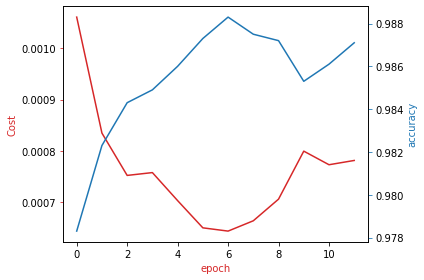

In [52]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(cv_cost_list_er, color=color)
ax1.set_xlabel('epoch', color=color)
ax1.set_ylabel('Cost', color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color) 
ax2.set_xlabel('epoch', color=color)
ax2.plot( accuracy_list_er, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

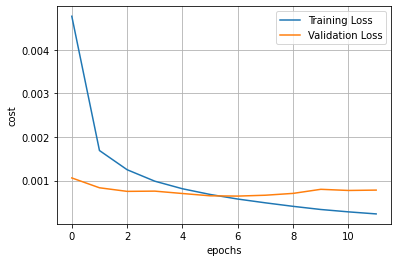

In [54]:
plt.plot(training_cost_list_er, label='Training Loss')
plt.plot(cv_cost_list_er, label='Validation Loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('cost')
plt.grid()
plt.show()

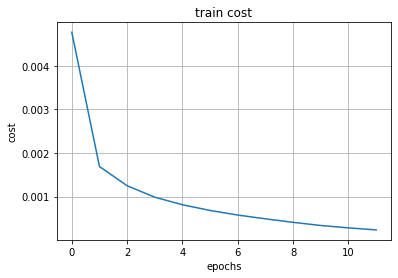

In [55]:
plt.plot(training_cost_list_er, label='Training Loss')
plt.xlabel('epochs')
plt.ylabel('cost')
plt.title('train cost')
plt.grid()
plt.show()

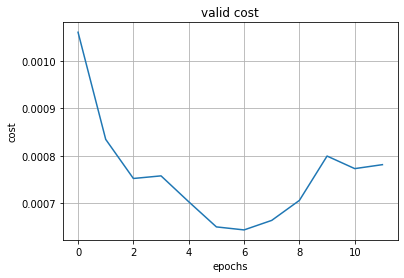

In [56]:
plt.plot(cv_cost_list_er, label='Validation Loss')
plt.xlabel('epochs')
plt.ylabel('cost')
plt.title('valid cost')
plt.grid()
plt.show()

In [57]:
cv_cost_list_er

[0.0010605668313422938,
 0.0008348898131567694,
 0.0007525202940305462,
 0.0007580207264501951,
 0.0007034925654865219,
 0.0006505296784889652,
 0.0006441735648695612,
 0.0006642486102855401,
 0.0007063375311621712,
 0.0007997539776000849,
 0.0007733023360233801,
 0.0007816240977931557]

In [58]:
accuracy_list_er

[0.9783,
 0.9823,
 0.9843,
 0.9849,
 0.986,
 0.9873,
 0.9883,
 0.9875,
 0.9872,
 0.9853,
 0.9861,
 0.9871]

## new

In [92]:
class CNN(nn.Module):
    
    # Contructor
    def __init__(self, out_1=64, out_2=128,number_of_classes=10):
        super(CNN, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2)
        self.conv1_bn = nn.BatchNorm2d(out_1)

        self.maxpool1=nn.MaxPool2d(kernel_size=2)
        
        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2)
        self.conv2_bn = nn.BatchNorm2d(out_2)

        self.maxpool2=nn.MaxPool2d(kernel_size=2)
        
        self.fc1 = nn.Linear(out_2 * 7 * 7, 30)
        self.bn_fc1 = nn.BatchNorm1d(30)
        
        self.fc2 = nn.Linear(30, number_of_classes)
        self.bn_fc2= nn.BatchNorm1d(10)
        
    # Prediction
    def forward(self, x):
        x = self.cnn1(x)
        x=self.conv1_bn(x)
        x = torch.relu(x)
        x = self.maxpool1(x)
        x = self.cnn2(x)
        x=self.conv2_bn(x)
        x = torch.relu(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x=self.bn_fc1(x)
        x = self.fc2(x)
        x=self.bn_fc2(x)
        return x

In [93]:
model = CNN(out_1=64, out_2=128)
model.to(device)

CNN(
  (cnn1): Conv2d(1, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv1_bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv2_bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=6272, out_features=30, bias=True)
  (bn_fc1): BatchNorm1d(30, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=30, out_features=10, bias=True)
  (bn_fc2): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

In [94]:
def train_model(model,train_loader,validation_loader,optimizer,n_epochs=4):

  N_train=len(train_dataset)  
  N_test=len(validation_dataset)
  accuracy_list=[]
  training_loss_list=[]
  training_cost_list=[]
  cv_loss_list=[]
  cv_cost_list=[]

  # initialize the early_stopping object
  early_stopping = EarlyStopping(patience=patience, verbose=True, path='modify.pt')

  for epoch in range(n_epochs):
    training_cost = 0
    for x, y in train_loader:
      model.train()
      x, y = x.to(device), y.to(device)
      optimizer.zero_grad()
      z = model(x)
      loss = criterion(z, y)
      loss.backward()
      optimizer.step()
      training_loss_list.append(loss.data)
      training_cost += loss.item()
    training_cost = training_cost / N_train   
    training_cost_list.append(training_cost)

    correct=0
    cv_cost = 0
    for x_test, y_test in validation_loader:
      model.eval()
      x_test, y_test= x_test.to(device), y_test.to(device)
      z = model(x_test)
      loss = criterion(z, y_test)
      cv_loss_list.append(loss.data)
      cv_cost += loss.item()
      _, yhat = torch.max(z.data, 1)
      correct += (yhat == y_test).sum().item()  
    accuracy = correct / N_test
    accuracy_list.append(accuracy)
    cv_cost = cv_cost / N_test
    cv_cost_list.append(cv_cost)

    print('['+str(epoch+1)+'/'+str(n_epochs)+']','train_cost:',training_cost,'valid_cost:',cv_cost)

    early_stopping(cv_cost, model)

    if early_stopping.early_stop:
      print("Early stopping")
      break

  # load the last checkpoint with the best model
  model.load_state_dict(torch.load('modify.pt'))

     
  return model, accuracy_list, training_loss_list, training_cost_list, cv_loss_list, cv_cost_list

In [95]:
patience = 5 ##cost開始上升的容忍度
criterion = nn.CrossEntropyLoss()
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=32)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=64)

In [96]:
model, accuracy_list_er, training_loss_list_er, training_cost_list_er, cv_loss_list_er, cv_cost_list_er = train_model(model=model,n_epochs=100,train_loader=train_loader,validation_loader=validation_loader,optimizer=optimizer)

[1/100] train_cost: 0.005207360451645218 valid_cost: 0.0008527339919935912
Validation loss decreased (inf --> 0.000853).  Saving model ...
[2/100] train_cost: 0.001983058262829824 valid_cost: 0.0006586088433861733
Validation loss decreased (0.000853 --> 0.000659).  Saving model ...
[3/100] train_cost: 0.0012074399831229433 valid_cost: 0.0005476101049338468
Validation loss decreased (0.000659 --> 0.000548).  Saving model ...
[4/100] train_cost: 0.0007368348453979706 valid_cost: 0.0005671509803563822
EarlyStopping counter: 1 out of 5
[5/100] train_cost: 0.0004398685202310541 valid_cost: 0.00046984258020529526
Validation loss decreased (0.000548 --> 0.000470).  Saving model ...
[6/100] train_cost: 0.00026578686627472053 valid_cost: 0.00045466500608017666
Validation loss decreased (0.000470 --> 0.000455).  Saving model ...
[7/100] train_cost: 0.00015537932926442104 valid_cost: 0.00038995465772750324
Validation loss decreased (0.000455 --> 0.000390).  Saving model ...
[8/100] train_cost: 9.

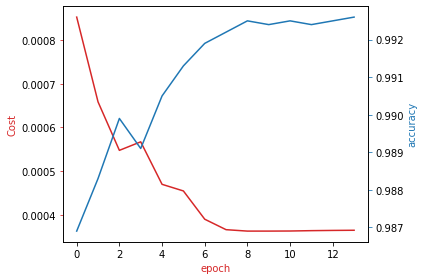

In [97]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(cv_cost_list_er, color=color)
ax1.set_xlabel('epoch', color=color)
ax1.set_ylabel('Cost', color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color) 
ax2.set_xlabel('epoch', color=color)
ax2.plot( accuracy_list_er, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

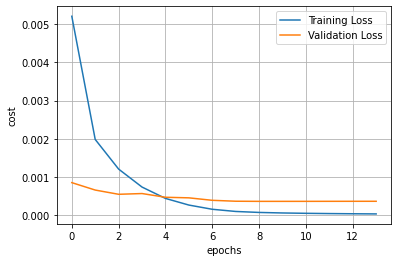

In [103]:
plt.plot(training_cost_list_er, label='Training Loss')
plt.plot(cv_cost_list_er, label='Validation Loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('cost')
plt.grid()
plt.show()

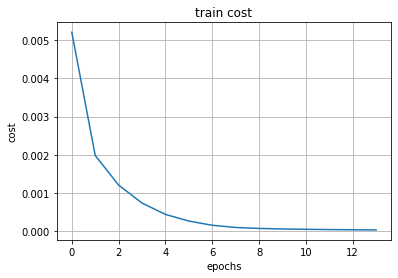

In [99]:
plt.plot(training_cost_list_er, label='Training Loss')
plt.xlabel('epochs')
plt.ylabel('cost')
plt.title('train cost')
plt.grid()
plt.show()

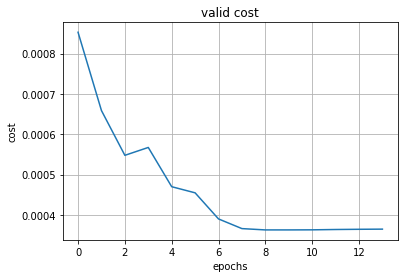

In [100]:
plt.plot(cv_cost_list_er, label='Validation Loss')
plt.xlabel('epochs')
plt.ylabel('cost')
plt.title('valid cost')
plt.grid()
plt.show()

In [101]:
cv_cost_list_er

[0.0008527339919935912,
 0.0006586088433861733,
 0.0005476101049338468,
 0.0005671509803563822,
 0.00046984258020529526,
 0.00045466500608017666,
 0.00038995465772750324,
 0.00036597873574392,
 0.0003627251250156405,
 0.0003627313316821528,
 0.00036293503662964213,
 0.0003637466319622035,
 0.00036427984342262787,
 0.0003646522746941628]

In [102]:
accuracy_list_er

[0.9869,
 0.9883,
 0.9899,
 0.9891,
 0.9905,
 0.9913,
 0.9919,
 0.9922,
 0.9925,
 0.9924,
 0.9925,
 0.9924,
 0.9925,
 0.9926]